In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X=train_data.iloc[:,1:].values
Y=train_data.iloc[:,0].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

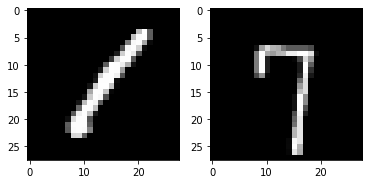

In [5]:
plt.subplot(121)
array = np.reshape(np.array(X[0]), (28, 28))
plt.imshow(array,cmap='gray')
plt.subplot(122)
array = np.reshape(np.array(X[50]), (28, 28))
plt.imshow(array,cmap='gray')


In [6]:
train_data.isnull().values.any()

False

In [7]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=432)

In [9]:
x_train.shape

(33600, 784)

In [10]:
model=make_pipeline(StandardScaler(),SVC(gamma="auto"))
model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [11]:
model.score(x_test,y_test)

0.9621428571428572

In [12]:
test=test_data.values
y_pred=model.predict(test)

In [13]:
output = pd.DataFrame({"Label": y_pred})
output.insert(0,"ImageId",range(1,len(output)+1))
output.to_csv("./submission.csv",index=False)